<a href="https://colab.research.google.com/github/RishabhNegi1/Project-Fake-News-/blob/main/FakeNewsClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()  # This will open a file picker to upload your CSV file.

Saving train.csv.zip to train.csv.zip


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('train.csv.zip')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
#Get the independent features
X=df.drop('label',axis=1)#removing the target column which is label ; axis=1 means columns

In [ ]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [ ]:
#get the dependent features
y=df['label']
y.head()

,label
0,1
1,0
2,1
3,1
4,1


In [ ]:
df.shape

(20800, 5)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,HashingVectorizer  # imports three different text vectorization techniques from the scikit-learn library

In [ ]:
df=df.dropna()  #drop NAN values

In [ ]:
df.head(10)  #record 8th and 6th had nan values

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [ ]:
messages=df.copy()  #making a copy of df

In [ ]:
#resetting the index
messages.reset_index(inplace=True)
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [ ]:
#Now to pre process the data i.e. to remove all the stopwords and the special characters
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
corpus=[]   #will store the cleaned text data.
for i in range(0,len(messages)):    #This loop iterates over every entry in the messages DataFrame (or list). Each iteration processes one text entry
  review=re.sub('[^a-zA-Z]',' ',messages['title'][i])   #Uses regular expressions to remove all characters that are not letters (i.e., anything that is not between 'a' and 'z' or 'A' and 'Z'). This replaces them with a space (' ').
  review=review.lower()   #Converts the entire text to lowercase
  review=review.split()   #Splits the text into individual words (tokens)
  review=[ps.stem(word) for word in review if not word in stopwords.words('english')]   #removes stopwords only
  review=' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [ ]:
#converting the preprocessed text data into a numerical format
#apply Countvectorizer
#Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000,ngram_range=(1,3))   # keeps only the top 5,000 most frequent words and it can take comb of 1,2 or 3 words
X=cv.fit_transform(corpus).toarray()  #converts the resulting sparse matrix into a dense numpy array


In [ ]:
X.shape

(18285, 5000)

1. X (Features):
What it Represents: X is a matrix that contains the features or input variables of your dataset. These are the variables that the machine learning model will use to make predictions.
Structure: X is typically structured as a 2-dimensional array or DataFrame where each row represents an observation (or data point) and each column represents a feature.
Example: If you're building a model to predict house prices, X might include features like the size of the house, the number of bedrooms, the neighborhood, etc.
2. y (Target or Labels):
What it Represents: y is a vector that contains the target variable, which is what the model is trying to predict. Each entry in y corresponds to the label for the respective observation in X.
Structure: y is typically a 1-dimensional array or Series where each element represents the target value for the corresponding row in X.
Example: Continuing with the house price prediction example, y would contain the actual prices of the houses.

In [ ]:
y=messages['label']

train_test_split: This function splits the dataset into two parts: a training set and a testing set.
X_train, X_test: These variables hold the features (text data) for the training and testing datasets, respectively.
y_train, y_test: These variables hold the labels (target variables) for the training and testing datasets, respectively.
test_size=0.33: This specifies that 33% of the data should be used for testing, and the remaining 67% for training.
random_state=0: This ensures that the splitting is reproducible. The same random state will result in the same split if the code is run multiple times.

By using a separate testing set, we ensure that the model doesn't just memorize the training data (a problem known as overfitting), but rather learns generalizable patterns.

In [ ]:
##Divide the dataset into Train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=0)


to view the first 20 features (words or n-grams) identified by the CountVectorizer, you can use the get_feature_names_out() method

In [ ]:
cv.get_feature_names_out()[:20]

array(['abandon', 'abc', 'abc news', 'abduct', 'abe', 'abedin', 'abl',
       'abort', 'abroad', 'absolut', 'abstain', 'absurd', 'abus',
       'abus new', 'abus new york', 'academi', 'accept', 'access',
       'access pipelin', 'access pipelin protest'], dtype=object)

The method cv.get_params() is used to retrieve all the parameters of the CountVectorizer instance cv. These parameters define how the CountVectorizer will process the text data and convert it into a matrix of token counts (or features).

What cv.get_params() Does:
Returns a Dictionary: It returns a dictionary where the keys are the names of the parameters, and the values are the current settings or values of those parameters.
Useful for Inspection and Debugging: You can use this method to inspect which parameters are being used by the CountVectorizer and what their values are. This is particularly useful for understanding the configuration of the vectorizer or when you want to modify certain parameters.

In [ ]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

The code snippet you've provided is used to convert the training data matrix (X_train) into a pandas DataFrame, which makes it easier to inspect and manipulate the data

Explanation:
pd.DataFrame(X_train, columns=cv.get_feature_names_out()):

X_train: This is the training data matrix generated by CountVectorizer. It is a 2D numpy array where each row corresponds to a document and each column corresponds to a feature (word or n-gram).
columns=cv.get_feature_names_out(): This specifies the column names for the DataFrame. cv.get_feature_names_out() returns an array of feature names, i.e., the words or n-grams that were used as features by the CountVectorizer.
pd.DataFrame(...): This converts the X_train matrix into a pandas DataFrame with the feature names as the column headers. This is useful for analyzing the data, as it allows you to see which words or n-grams are most common in your text data.
count_df.head():

count_df.head(): This displays the first five rows of the DataFrame. It’s a quick way to inspect the contents of the DataFrame, showing you the word counts (or n-gram counts) for the first five documents in the training set.

In [ ]:
count_df=pd.DataFrame(X_train,columns=cv.get_feature_names_out())
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import matplotlib.pyplot as plt

This function is a comprehensive tool for visualizing a confusion matrix, which is crucial for understanding how well a classification model performs on different classes. By setting the normalize parameter, you can choose between raw counts and relative percentages, which can be more informative in imbalanced datasets. The function enhances interpretability by overlaying numerical values on the matrix and using color coding to indicate magnitude.

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

MultinomialNB Algorithm

1. Purpose:
Bag of Words (BoW):
The Bag of Words model is a text preprocessing technique. It converts text data into a numerical format that can be fed into machine learning algorithms. Specifically, it creates a matrix where each row represents a document and each column represents a word from the corpus, with the values being the word counts (or frequencies) in each document.
BoW itself is not a machine learning algorithm; it is simply a way to represent text data numerically.
Multinomial Naive Bayes (MultinomialNB):
MultinomialNB is a classification algorithm that can be used to predict the class of a document based on its word counts or frequencies. It applies Bayes' Theorem with the "naive" assumption that features (in this case, words) are independent given the class.
It is a probabilistic model that uses the BoW representation as input and learns the likelihood of different classes given the word frequencies.
2. Stage in the Pipeline:
Bag of Words (BoW):
BoW is typically the first step in the text classification pipeline. It processes raw text data into a format that machine learning models can understand, creating feature vectors from the text.
Multinomial Naive Bayes (MultinomialNB):
MultinomialNB comes into play after the BoW step. It takes the feature vectors created by BoW as input and then uses them to train a classifier that can predict the class labels of new documents.
3. Output:
Bag of Words (BoW):
The output of BoW is a sparse matrix (usually very large) where each element represents the frequency of a word in a specific document.
Multinomial Naive Bayes (MultinomialNB):
The output of MultinomialNB is a trained classification model that can make predictions on new data, assigning probabilities to each possible class label.
4. Use Case Example:
Bag of Words (BoW):
Imagine you have a corpus of 100 text documents. You use BoW to create a matrix where each document is represented by a vector of word frequencies. This matrix is the input to your machine learning model.
Multinomial Naive Bayes (MultinomialNB):
After creating the BoW matrix, you feed it into a MultinomialNB classifier. The classifier is trained on the matrix and learns to predict whether each document belongs to a certain class (e.g., spam or not spam). Once trained, this classifier can predict the class of new, unseen documents.
5. Mathematical Basis:
Bag of Words (BoW):
BoW doesn't involve any probability or statistical modeling; it's purely a method to represent text as numbers.
Multinomial Naive Bayes (MultinomialNB):
MultinomialNB is based on probabilistic modeling, using Bayes' Theorem to calculate the likelihood of different class labels given the features extracted by BoW.
Summary:
Bag of Words is a feature extraction technique used to convert text into numerical data.
Multinomial Naive Bayes is a machine learning algorithm that takes the output from the BoW model and uses it to classify text documents.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [ ]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.902
Confusion matrix, without normalization


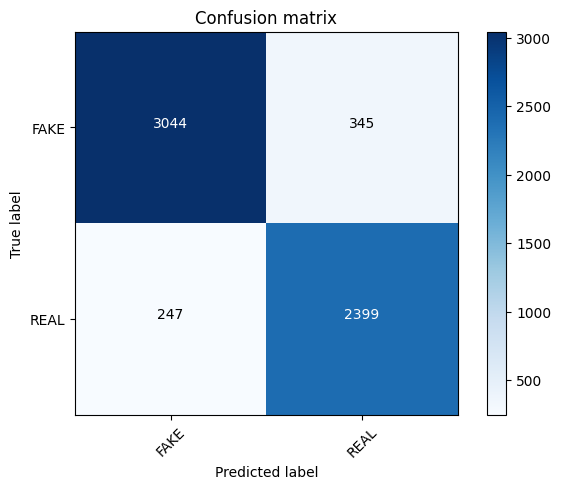

In [ ]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

Top-Left (3044): The number of true "FAKE" articles that were correctly predicted as "FAKE."
Top-Right (345): The number of true "FAKE" articles that were incorrectly predicted as "REAL."
Bottom-Left (247): The number of true "REAL" articles that were incorrectly predicted as "FAKE."
Bottom-Right (2399): The number of true "REAL" articles that were correctly predicted as "REAL."

In [ ]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.9019055509527755

In [ ]:
y_train.shape

(12250,)

Passive Aggressive Classifier Algorithm

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)


Passive-Aggressive Classifier (PAC):
What It Is: PAC is another type of classification algorithm, particularly useful for large datasets or streaming data, where it learns incrementally.
When It’s Applied: Similar to MultinomialNB, PAC is applied after the BoW model has created the feature matrix. It can be used in place of or alongside other classifiers. It updates its model incrementally as new data arrives, making it suitable for online learning scenarios.

accuracy:   0.920
Confusion matrix, without normalization


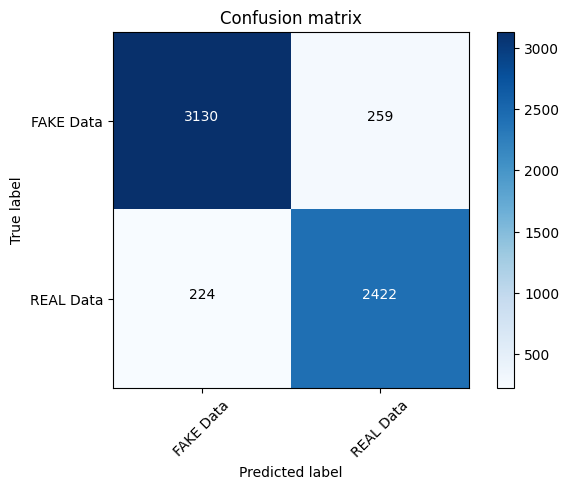

In [ ]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

Multinomial Classifier with Hyperparameter Tuning


Hyperparameter Tuning:
Goal: The goal of hyperparameter tuning is to find the set of hyperparameters that allow the model to perform best on the validation set, and ideally, generalize well to unseen data.
Techniques:
Grid Search: Exhaustively tries all possible combinations of specified hyperparameter values.
Random Search: Samples a fixed number of hyperparameter combinations randomly from the parameter space.
Cross-Validation: Often combined with grid or random search, cross-validation helps in evaluating model performance more robustly by splitting the data into multiple training and validation sets.



Why Hyperparameter Tuning is Important:
Performance Improvement: Fine-tuning hyperparameters can significantly improve model performance.
Avoiding Overfitting: Proper tuning can help the model generalize better by avoiding overfitting to the training data.
Automation: Automated tuning techniques like Grid Search and Random Search help in systematically finding the optimal parameters.

In [ ]:
classifier=MultinomialNB(alpha=0.1)

In [ ]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:624: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


Alpha: 0.0, Score : 0.8903065451532726
Alpha: 0.1, Score : 0.9020712510356255
Alpha: 0.2, Score : 0.9025683512841757
Alpha: 0.30000000000000004, Score : 0.9024026512013256
Alpha: 0.4, Score : 0.9017398508699255
Alpha: 0.5, Score : 0.9015741507870754
Alpha: 0.6000000000000001, Score : 0.9022369511184756
Alpha: 0.7000000000000001, Score : 0.9025683512841757
Alpha: 0.8, Score : 0.9015741507870754
Alpha: 0.9, Score : 0.9017398508699255


In [ ]:
## Get Features names
feature_names = cv.get_feature_names_out()

In [ ]:
log_prob = classifier.feature_log_prob_

# For better interpretability, we'll exponentiate these log probabilities to get back to probability space
feature_importance_real = sorted(zip(np.exp(log_prob[0]), feature_names), reverse=True)[:20]
feature_importance_fake = sorted(zip(np.exp(log_prob[1]), feature_names), reverse=True)[:5000]

# Display the top features for the "real" and "fake" classes
print("Top features for the 'real' class:")
print(feature_importance_real)

print("\nTop features for the 'fake' class:")
print(feature_importance_fake)

Top features for the 'real' class:
[(0.05250442924356736, 'new'), (0.05007567846624975, 'time'), (0.0497588848865997, 'york'), (0.049747151791057105, 'new york'), (0.049054899154043805, 'york time'), (0.049054899154043805, 'new york time'), (0.01897124218282511, 'breitbart'), (0.018232057163641496, 'trump'), (0.0051144563470180366, 'donald'), (0.005079257060390249, 'donald trump'), (0.0031667624869469333, 'say'), (0.002497976041018905, 'obama'), (0.0024393105633059194, 'clinton'), (0.002228114843539172, 'presid'), (0.0021929155569113817, 'state'), (0.0020755846014854124, 'report'), (0.002052118410400217, 'attack'), (0.0019230543594316502, 'hous'), (0.001911321263889053, 'brief'), (0.0018057234040056802, 'hillari')]

Top features for the 'fake' class:
[(0.018312907193949624, 'trump'), (0.013734110893434785, 'hillari'), (0.012321745865415295, 'clinton'), (0.007446808510638304, 'elect'), (0.005647182103968294, 'new'), (0.005328260968609052, 'comment'), (0.005123240238735252, 'video'), (0.